In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import datetime

In [2]:
today_str = datetime.datetime.now().strftime('%Y%m%d.%H%M%S')
COUNTRIES = ('ID','CN','IT','US','ES','JP','KR','TW','NO','IR','MY','IN','TH','CN','KR')
#COUNTRIES = ('ID','MY','IN','TH','CN','KR')

In [3]:
df = pd.read_excel(
    'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx',
    parse_dates=True
)
# Hari yang kasus barunya minus adalah data yang salah, jadi dikecualikan
df = df[df.cases >= 0]

In [5]:
df2 = df.assign(total_cases_before=df.sort_values(['dateRep'])
                                     .groupby(['geoId'])
                                     .cases.cumsum())

In [6]:
df2['total_cases_before'] = df2['total_cases_before'] - df2['cases']

In [15]:
df3 = df2[df2.geoId.isin(COUNTRIES) & df2.deaths.gt(0)][['countriesAndTerritories', 'geoId', 'total_cases_before', 'deaths']]
#df3 = df2[df2.deaths.gt(0)][['countriesAndTerritories', 'geoId', 'total_cases_before', 'deaths']]

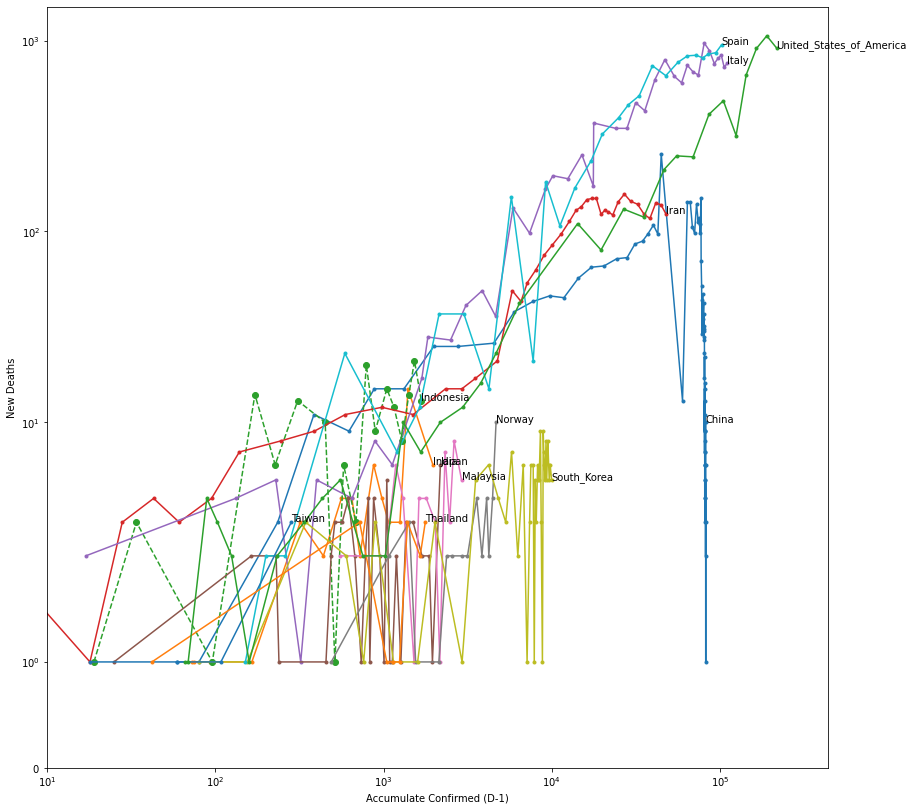

In [18]:
plt.figure(figsize=(14,14))
for c in df3.geoId.unique():
    df4 = df3[df3.geoId == c].sort_values(by='total_cases_before')
    if not len(df4): continue
    marker = 'o--' if c == 'ID' else '.-'
    label = df4.countriesAndTerritories.iloc[0]
    plt.plot(df4['total_cases_before'], df4['deaths'], marker, label=label)
    plt.annotate(label, xy=(df4['total_cases_before'].iloc[-1], df4['deaths'].iloc[-1]), textcoords='data')

plt.xscale('symlog')
plt.yscale('symlog')
plt.axis(xmin=10,ymin=0,ymax=1500)
#plt.legend(ncol=len(df3.countriesAndTerritories.unique())//20+1,loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Accumulate Confirmed (D-1)')
plt.ylabel('New Deaths')

plt.savefig(f'{today_str}_deaths_vs_accum_nolog.png')

01 January 2020
01 January 2020
11 January 2020
21 January 2020
31 January 2020
10 February 2020
20 February 2020
01 March 2020
11 March 2020
21 March 2020
01 January 2020


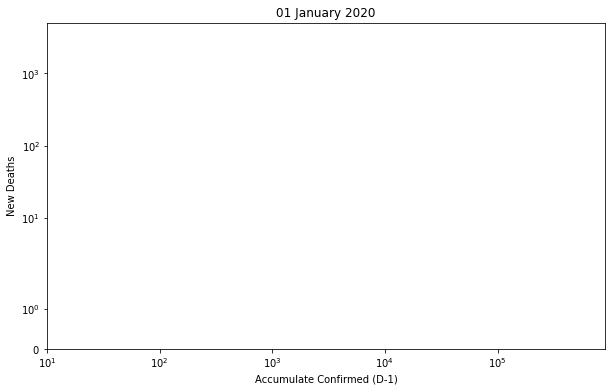

In [9]:
df3 = (df2[df2.geoId.isin(COUNTRIES) & df2.deaths.gt(0)]
       [['countriesAndTerritories', 'geoId', 'total_cases_before', 'deaths', 'dateRep']])

fig = plt.figure(figsize=(10,6))

num = (datetime.date.today() - datetime.date(2020,1,1)).days + 1
d = np.datetime64('2020-01-01')
def animate(i):
    i = min(i, 31+29+29)
    if i%10 == 0:
        print((d+i).astype(datetime.datetime).strftime('%d %B %Y'))
    fig.clear()
    for c in df3.geoId.unique():
        df4 = df3[df3.geoId.eq(c) & df3.dateRep.lt(d+i+1)].sort_values(by=['total_cases_before'])
        marker = 'o-' if c == 'ID' else '.-'
        label = df3[df3.geoId.eq(c)].countriesAndTerritories.iloc[0]
        plt.plot(df4['total_cases_before'], df4['deaths'], marker, label=label)
        if len(df4['total_cases_before']):
            plt.annotate(label, (df4['total_cases_before'].iloc[-1], df4['deaths'].iloc[-1]))
    plt.xscale('symlog')
    plt.yscale('symlog')
    plt.title((d+i).astype(datetime.datetime).strftime('%d %B %Y'))
    plt.axis(xmin=10,ymin=0,xmax=900000,ymax=5000)
    #plt.legend(ncol=len(df3.countriesAndTerritories.unique())//20+1,loc='center left', bbox_to_anchor=(1, 0.5))

    plt.xlabel('Accumulate Confirmed (D-1)')
    plt.ylabel('New Deaths')
    
ani = animation.FuncAnimation(fig, animate, 31+29+31+60, interval=200) 
ani.save(f'{today_str}_deaths vs accum.mp4')

In [10]:
df3 = df2[df2.geoId.isin(COUNTRIES) & df2.deaths.gt(0)][['countriesAndTerritories', 'geoId', 'total_cases_before', 'deaths', 'popData2018']]
df3['deaths'] = df3.deaths * 100.0 / df3.popData2018
df3['total_cases_before'] = df3.total_cases_before * 100.0 / df3.popData2018

Text(0, 0.5, 'New Deaths %')

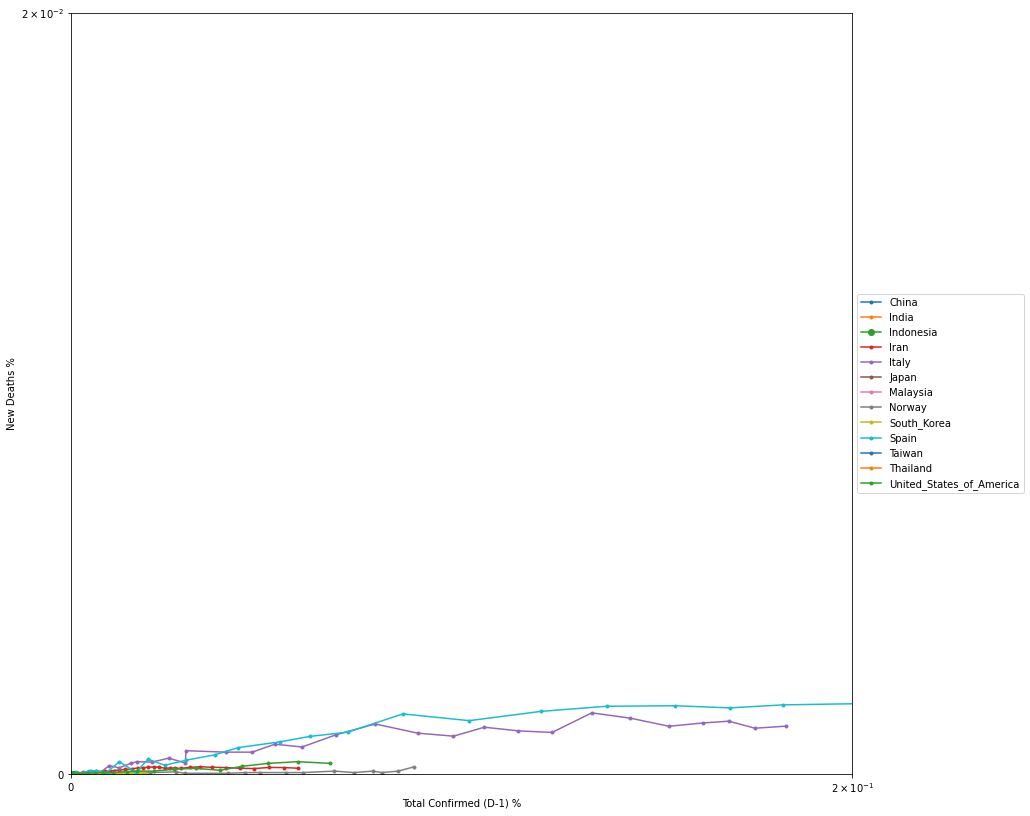

In [11]:
plt.figure(figsize=(14,14))
for c in df3.geoId.unique():
    df4 = df3[df3.geoId == c]
    marker = 'o-' if c == 'ID' else '.-'
    plt.plot(df4['total_cases_before'], df4['deaths'], marker, label=df4.countriesAndTerritories.iloc[0])
plt.xscale('symlog')
plt.yscale('symlog')
plt.axis(xmin=0,ymin=0,xmax=0.2,ymax=0.02)
plt.legend(ncol=len(df3.countriesAndTerritories.unique())//20+1,loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Total Confirmed (D-1) %')
plt.ylabel('New Deaths %')

In [12]:
plt.savefig(f'{today_str}_deaths_vs_accum_pct.png')

<Figure size 432x288 with 0 Axes>